# Packages import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus

from IPython.display import Image
from six import StringIO
from sklearn import preprocessing, svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Data Import

### Bank Additional Full Data

In [2]:
df_baf = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
df_baf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_baf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_baf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
print('Column name')
for col in df_baf.columns:
    if df_baf[col].dtype=='object':
        print(col, df_baf[col].nunique())

Column name
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [6]:
categ = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categ:
    df_baf[col] = df_baf[col].astype('category')

In [7]:
# check missing value
missing = df_baf.isnull().sum()/len(df_baf)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_baf.isnull().sum()[df_baf.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


# Models

### Split data into train set and test set

In [8]:
# Split independent and dependent variable

X = df_baf.select_dtypes(['number'])
y = df_baf["y"]

In [9]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [10]:
model = LogisticRegression(solver="liblinear", random_state=11)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=11, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)
print("Train Report:\n\n", classification_report(y_train, train_prediction))
print("Test Report:\n\n", classification_report(y_test, test_prediction))

Train Report:

               precision    recall  f1-score   support

          no       0.93      0.98      0.95     29245
         yes       0.67      0.39      0.49      3705

    accuracy                           0.91     32950
   macro avg       0.80      0.68      0.72     32950
weighted avg       0.90      0.91      0.90     32950

Test Report:

               precision    recall  f1-score   support

          no       0.93      0.98      0.95      7303
         yes       0.68      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



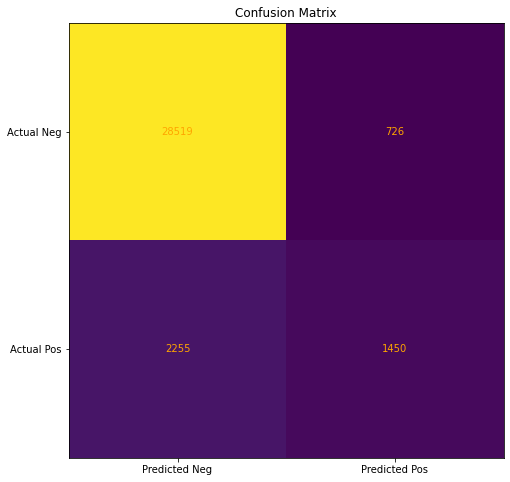

In [12]:
cm = confusion_matrix(y_train, train_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Neg", "Actual Pos"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Neg", "Predicted Pos"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

### K-Nearest Neighbors

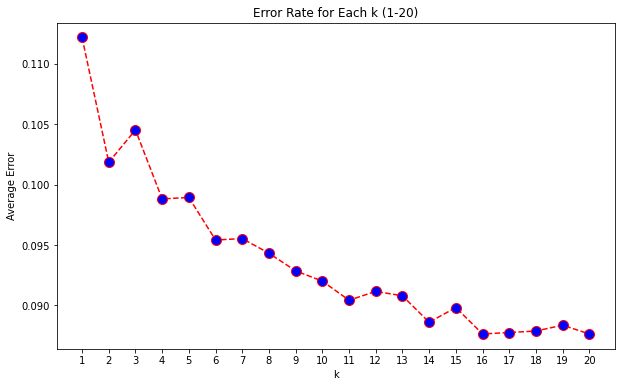

In [13]:
# Find optimum k

errors = []
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy = np.mean(pred == y_test)
    error = np.mean(pred != y_test)
    accuracies.append(accuracy)
    errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate for Each k (1-20)")
plt.xlabel("k")
plt.xticks(range(1, 21))
plt.ylabel("Average Error")
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("Test Report:\n\n", classification_report(y_test, prediction))

Test Report:

               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.47      0.55       935

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



### Support Vector Machine

In [15]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
prediction = model.predict(X_test)
print("Train Report:\n\n", classification_report(y_train, model.predict(X_train)))
print("Test Report:\n\n", classification_report(y_test, prediction))

Train Report:

               precision    recall  f1-score   support

          no       0.93      0.97      0.95     29245
         yes       0.66      0.40      0.50      3705

    accuracy                           0.91     32950
   macro avg       0.79      0.69      0.72     32950
weighted avg       0.90      0.91      0.90     32950

Test Report:

               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.65      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



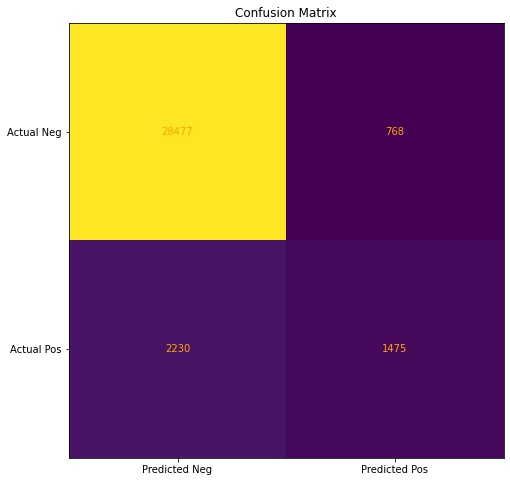

In [17]:
cm = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Neg", "Actual Pos"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Neg", "Predicted Pos"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [18]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10)
tree_clf.fit(X_train, y_train)

train_predictions = tree_clf.predict(X_train)
test_predictions = tree_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print("training report:\n\n", classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print("test report:\n\n", classification_report(y_test, test_predictions))

training accuracy: 0.9157207890743551
training report:

               precision    recall  f1-score   support

          no       0.94      0.96      0.95     29245
         yes       0.65      0.54      0.59      3705

    accuracy                           0.92     32950
   macro avg       0.80      0.75      0.77     32950
weighted avg       0.91      0.92      0.91     32950

test accuracy: 0.9140568099053168
test report:

               precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



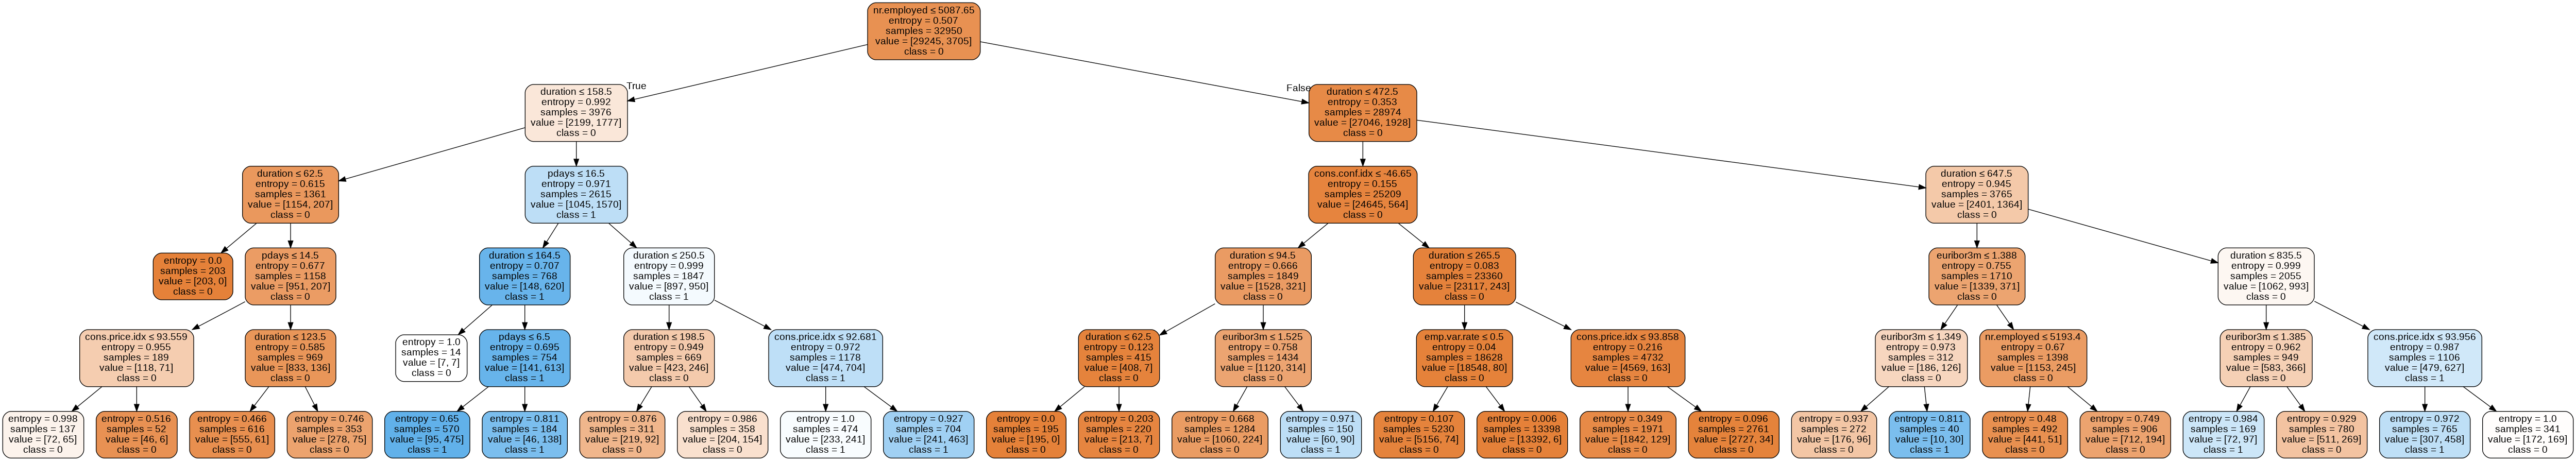

In [19]:
dot_data = StringIO()
tree.export_graphviz(
    tree_clf,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=list(X_train.columns),
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

In [20]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
test_predictions = rf_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

training accuracy: 0.9020940819423369
              precision    recall  f1-score   support

          no       0.90      0.99      0.95     29245
         yes       0.80      0.17      0.28      3705

    accuracy                           0.90     32950
   macro avg       0.85      0.58      0.62     32950
weighted avg       0.89      0.90      0.87     32950

test accuracy: 0.9003398883224083
              precision    recall  f1-score   support

          no       0.90      0.99      0.95      7303
         yes       0.79      0.16      0.27       935

    accuracy                           0.90      8238
   macro avg       0.85      0.58      0.61      8238
weighted avg       0.89      0.90      0.87      8238



In [21]:
# Defining the contribution of each features

feature_importances = pd.Series(rf_clf.feature_importances_, index=list(X_train.columns))
feature_importances

age               0.001553
duration          0.291128
campaign          0.000000
pdays             0.105741
previous          0.004239
emp.var.rate      0.083085
cons.price.idx    0.007381
cons.conf.idx     0.046880
euribor3m         0.003098
nr.employed       0.456896
dtype: float64

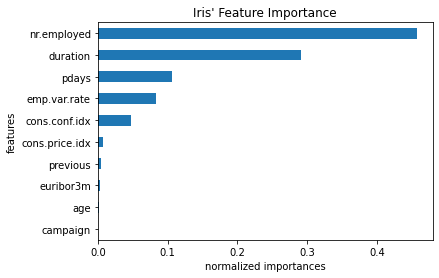

In [22]:
# Plotting the feature importances

feature_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Iris' Feature Importance")
plt.xlabel("normalized importances")
plt.ylabel("features")
plt.show()

In [23]:
# New train test data only with most contributing features

new_X_train = X_train.loc[:, ["duration", "nr.employed", "pdays", "euribor3m"]]
new_y_train = y_train
new_X_test = X_test.loc[:, ["duration", "nr.employed", "pdays", "euribor3m"]]
new_y_test = y_test

In [24]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(new_X_train, new_y_train)

train_predictions = rf_clf.predict(new_X_train)
test_predictions = rf_clf.predict(new_X_test)

print("training accuracy:", accuracy_score(new_y_train, train_predictions))
print(classification_report(new_y_train, train_predictions))

print("test accuracy:", accuracy_score(new_y_test, test_predictions))
print(classification_report(new_y_test, test_predictions))

training accuracy: 0.9053414264036419
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     29245
         yes       0.66      0.32      0.44      3705

    accuracy                           0.91     32950
   macro avg       0.79      0.65      0.69     32950
weighted avg       0.89      0.91      0.89     32950

test accuracy: 0.9014323865015781
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.63      0.31      0.42       935

    accuracy                           0.90      8238
   macro avg       0.78      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238



### Naive Bayes

In [25]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

train_predictions = gauss_nb.predict(X_train)
test_predictions = gauss_nb.predict(X_test)

print("trainng accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

trainng accuracy: 0.8694992412746586
              precision    recall  f1-score   support

          no       0.95      0.91      0.92     29245
         yes       0.44      0.59      0.50      3705

    accuracy                           0.87     32950
   macro avg       0.69      0.75      0.71     32950
weighted avg       0.89      0.87      0.88     32950

test accuracy: 0.8708424374848264
              precision    recall  f1-score   support

          no       0.95      0.91      0.93      7303
         yes       0.45      0.60      0.51       935

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238



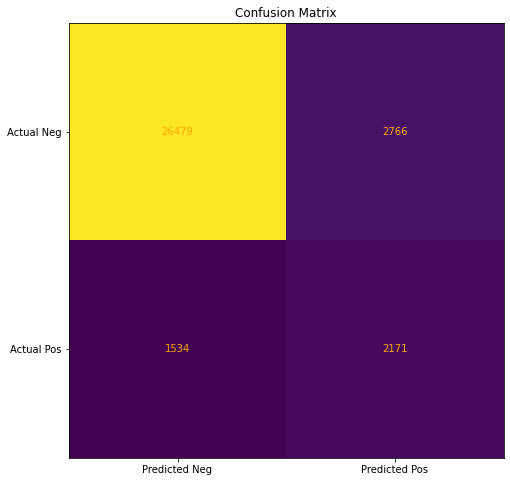

In [26]:
# Confusion Matrix

cm = confusion_matrix(y_train, train_predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual Neg", "Actual Pos"))
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted Neg", "Predicted Pos"))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="orange")
plt.title("Confusion Matrix")
plt.show()